In [21]:
# This cell can take some minutes to run
# You should only need to run this cell once and not everytime you open the script
# In case the plotting of the data below does not work because of the error "Error displaying widget: model not found"
# First, try only running "Run" << "Factory Reset"
# If this does not help, run this cell again and then "Run" << "Factory Reset"

# IMPORTANT: After running this cell, go to the top of the page and select "Run" << "Factory Reset"
!jupyter labextension install @jupyter-widgets/jupyterlab-manager jupyter-leaflet
!pip install install nodejs

An error occurred.
ValueError: Please install Node.js and npm before continuing installation. You may be able to install Node.js from your package manager, from conda, or directly from the Node.js website (https://nodejs.org).
See the log file for details:  C:\Users\nelez\AppData\Local\Temp\jupyterlab-debug-yb77_2o1.log


In [1]:
import matplotlib.pyplot as plt
import os

# You may make changes to the Lilygo module but your algorithm must work with the original version
# If you want to propose changes to the module, create a pull-request on github
from Lilygo.Recording import Recording, data_integrity
from Lilygo.Dataset import Dataset

# For interactive graphs
%matplotlib widget

# Reading sensor data from JSON file

Create an instance of the <code>Recording</code> class that manages the data from a file

In [3]:
trace = Recording('./data/recorded/group00_trace14.json', no_labels=False, mute=True)  # Second example file: data/example/short_walk.json

trace.DataIntegrityCheck()

# The data is stored inside a dictionary (access: trace.data["key"])
print("\r\nAvailable data traces:")
print(list(trace.data.keys()))

if not(trace.labels is None):
    print("\r\nLabels: ")
    print(trace.labels)

🟠 Warning: data trace phone_pressure missing
Finished Integrity Check!
🟠 Despite missing 1 non-essential sensors, this trace is suitable for submission as far as this automated test can judge.

Available data traces:
['az', 'my', 'phone_my', 'ax', 'ay', 'phone_rotm', 'phone_magrotx', 'phone_orientationz', 'phone_mz', 'altitude', 'gy', 'phone_rotx', 'temperature', 'speed', 'phone_az', 'phone_gravz', 'phone_magrotz', 'phone_mx', 'phone_roty', 'gz', 'phone_lay', 'phone_laz', 'mz', 'latitude', 'gx', 'phone_orientationy', 'longitude', 'mx', 'bearing', 'phone_light', 'phone_rotz', 'timestamp', 'phone_gy', 'phone_ay', 'phone_gx', 'phone_gz', 'phone_magroty', 'packetNumber', 'phone_orientationx', 'phone_lax', 'phone_gravx', 'phone_gravy', 'phone_ax']

Labels: 
{'board_loc': 2, 'path_idx': 3, 'activities': [0, 1], 'gender': 'f', 'body_height': 165, 'legi': '22-940-381'}


## Working with timeseries
Every value in this dictionary holds a <code>Dataset</code> object to manage the data from one sensor

# Plotting

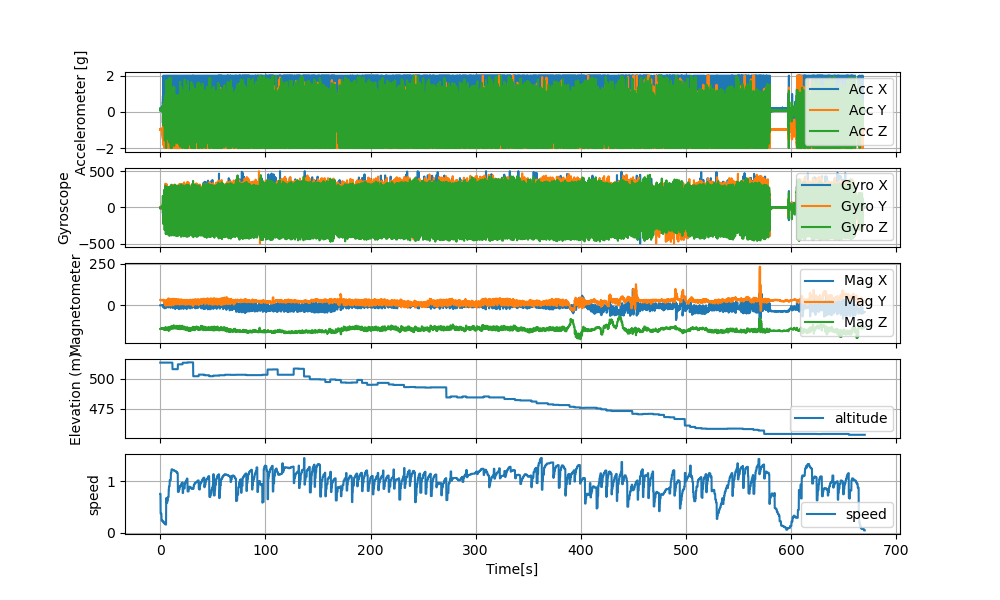

Text(0.5, 1.0, '01')

In [4]:
# Plot multiple sensors and multiple axis at the same time
trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
             ylabels=['Accelerometer [g]', 'Gyroscope', 'Magnetometer', 'Elevation (m)', 'speed'],
             labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['altitude'], ['speed']])
plt.savefig('./plot/trace01.png')
plt.title('01', pad=300)

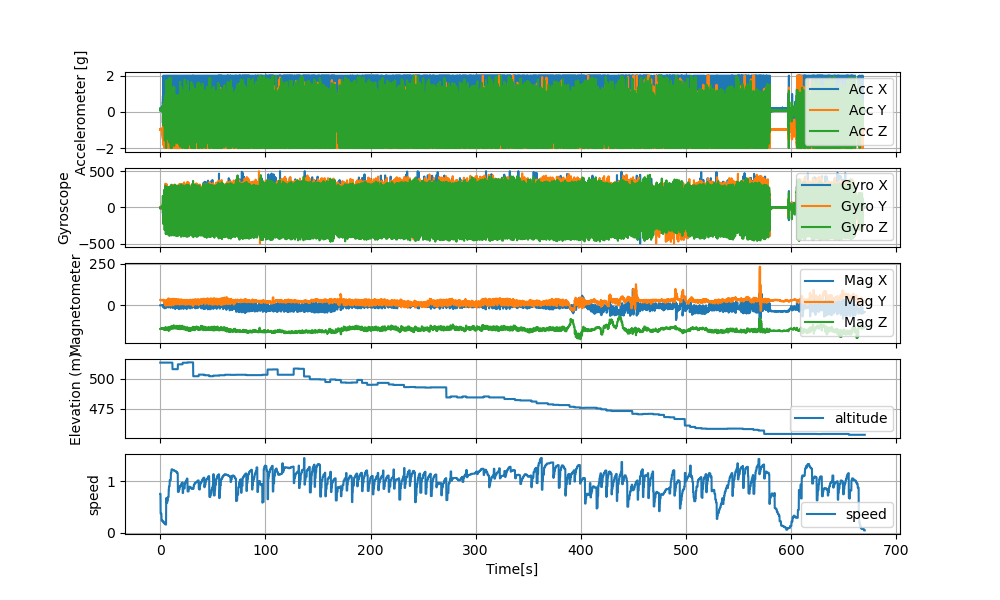

In [25]:
# plot and save all recorded data
labelsMeaning = '#L0:lWrist 1:belt 2:rAnkle #P0:c-mb 1:c-cla-mb 2:wb-mb 3:mb-wb 4:mb-coop #A0:still 1:walk 2:run 3:cycle )'
plt.rcParams["axes.titlesize"] = 8

path = './data/recorded'
traceNames=os.listdir(path)
traceNames=['group00_trace14.json']

for traceName in traceNames:
   
    if traceName[-5:] == '.json':
        #print(path+'/'+ traceName,traceName[-12:-5])
        trace = Recording(path+'/'+ traceName, no_labels=False, mute=True)
        trace.plot([['ax', 'ay', 'az'], ['gx', 'gy', 'gz'], ['mx', 'my', 'mz'], ['altitude'], ['speed']], 
                    ylabels=['Accelerometer [g]', 'Gyroscope', 'Magnetometer', 'Elevation (m)', 'speed'],
                    labels=[['Acc X', 'Acc Y', 'Acc Z'], ['Gyro X', 'Gyro Y', 'Gyro Z'], ['Mag X', 'Mag Y', 'Mag Z'], ['altitude'], ['speed']])
        plt.title(traceName[-12:-5]+ str(trace.labels)+labelsMeaning, pad=300, wrap=True)
        plt.savefig('./plot/'+traceName[-12:-5]+'.png') 

# test features to detect moving vs. non-moving


In [98]:
import numpy as np

def detect_moving(data, window_size=100, motif_size=60, num_motifs=10):
    """
    Detects moving phases in a 1D time series data using motif detection.

    Args:
    - data (ndarray): A 1D numpy array containing the time series data.
    - window_size (int): The size of the sliding window used to divide the data into segments.
    - motif_size (int): The size of the motif to use in motif detection.
    - num_motifs (int): The number of motifs to use in motif detection.

    Returns:
    - labels (list): A list containing binary labels (0 or 1) for each segment of the data. A label of 1 indicates a walking phase, while a label of 0 indicates a non-walking phase.
    - phases (list): A list containing the segmented data, where each element is a numpy array representing a segment.
    - data_only_moving (list): A list containing only the data points from the walking phases.

    """
    # Compute the motifs
    motifs = []
    for i in range(num_motifs):
        start_idx = np.random.randint(0, len(data) - motif_size)
        motif = data[start_idx:start_idx+motif_size]
        motifs.append(motif)
    
    # Divide the data into windows and compute the average distance between each window and the motifs
    labels = []
    phases = []
    data_only_moving = []
    for i in range(0, len(data) - window_size, window_size):
        window = data[i:i+window_size]
        window_motifs = []
        for i in range(0, len(window) - motif_size, motif_size):
            motif = window[i:i+motif_size]
            window_motifs.append(motif)
        # Truncate motifs array if necessary
        if len(window_motifs) < num_motifs:
            motifs = motifs[:len(window_motifs)]
        distances = np.array([np.sqrt(np.mean((m - wm)**2)) for m in motifs for wm in window_motifs])
        avg_distances = np.mean(distances.reshape(len(motifs), len(window_motifs)), axis=1)
        min_distance = np.min(avg_distances)
        if min_distance < 0.5:
            labels.append(1)
            phases.append(window)
            data_only_moving.extend(window)
        else:
            labels.append(0)
            phases.append(window)
    
    return labels, phases, data_only_moving


In [5]:
ax = trace.data['ax']
x = np.array(ax.values)

t_raw = ax.raw_timestamps
t_start= ax.raw_timestamps[0][1]
t = np.zeros(len(t_raw))
""" print('t_raw:',t_raw) 
print('t_start:',t_start) """
for i,time in enumerate(t_raw):
    t[i] = (trace.data['ax'].raw_timestamps[i][1]-t_start)/1e3 # in second
    #print('i=%d, time in s=%d'%(i, t[i]))

sampling_timepoints=np.linspace(0,t[-1],x.shape[0])

# Detect walking phases
labels, phases,data_only_moving = detect_moving(x, window_size=100, motif_size=50, num_motifs=3)
print(labels)


NameError: name 'np' is not defined

In [ ]:

# Plot the results
fig, ax = plt.subplots(2, 1, figsize=(10, 6), sharex=True)
ax[0].plot(sampling_timepoints, x)
ax[0].set_ylabel('Accelerometer data')
colors = ['r', 'g']
for i, phase in enumerate(phases):
    ax[1].plot(sampling_timepoints, x)
    #ax[1].plot(sampling_timepoints[i*100:(i+1)*100], phase, color=colors[labels[i]]) #window size:100
    if labels[i] == 1:
        ax[1].axvspan(sampling_timepoints*100, (sampling_timepoints+1)*100, facecolor='green', alpha=0.2)
    else:
        ax[1].axvspan(i*100, (i+1)*100, facecolor='red', alpha=0.2)
ax[1].set_xlabel('Time (s)')
ax[1].set_ylabel('Accelerometer data')
ax[1].set_ylim(-3, 3)
ax[1].legend(['Non-walking', 'Walking'])
plt.show()

fig, ax = plt.subplots(1, 1, figsize=(10, 6), sharex=True)
ax.plot(data_only_moving)
ax.set_title('data only moving')
plt.show()

# it shows high false negative. But we only need to keep the walking part for location detection and the false positive is low so it doesn't matter

# Display GPS data

In [ ]:
# Trace must contain gps data
# assert('latitude' in trace.data and 'longitude' in trace.data)

plot_map_zurich = True

# Visualize the path of the trace
fig, ax = plt.subplots(figsize = (12,8))

# central
ax.scatter(8.5441, 47.3768, zorder=1, alpha= 0.3, c='r', s=500)
# Main building
ax.scatter(8.5486, 47.3766, zorder=1, alpha= 0.3, c='r', s=300)
# P2 End/P3 start
ax.scatter(8.5415, 47.3785, zorder=1, alpha= 0.3, c='r', s=300)
# P4 End
ax.scatter(8.5418, 47.3770, zorder=1, alpha= 0.3, c='r', s=300)
# P1 corner
ax.scatter(8.5467, 47.3782, zorder=1, alpha= 0.3, c='r', s=300)
# path
ax.scatter(trace.data['longitude'].values, trace.data['latitude'].values, zorder=1, alpha= 0.9, c='b', s=10)
ax.set_title('Visualization of the path')

if plot_map_zurich:
    # Bounding coordinates for map
    BBox = (8.5373,8.5593,
            47.3673, 47.3880)
    # Load map of Zurich
    ruh_m = plt.imread('mapzurich_labeled.JPG')
    ax.set_title('GPS visualization in Zurich')
    ax.set_xlim(BBox[0],BBox[1])
    ax.set_ylim(BBox[2],BBox[3])
    ax.imshow(ruh_m, zorder=0, extent = BBox)

# Display altitude (height) data

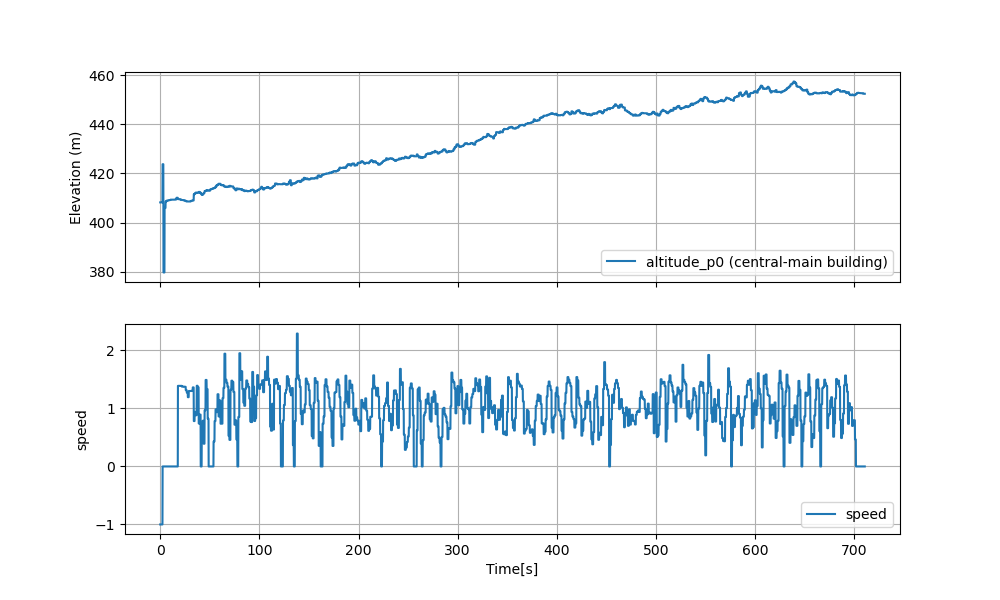

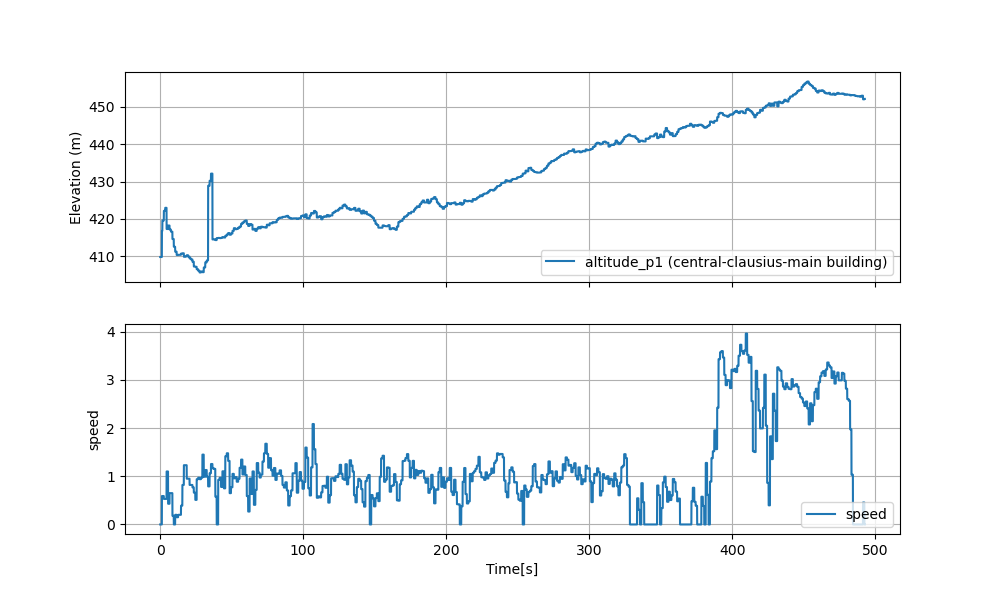

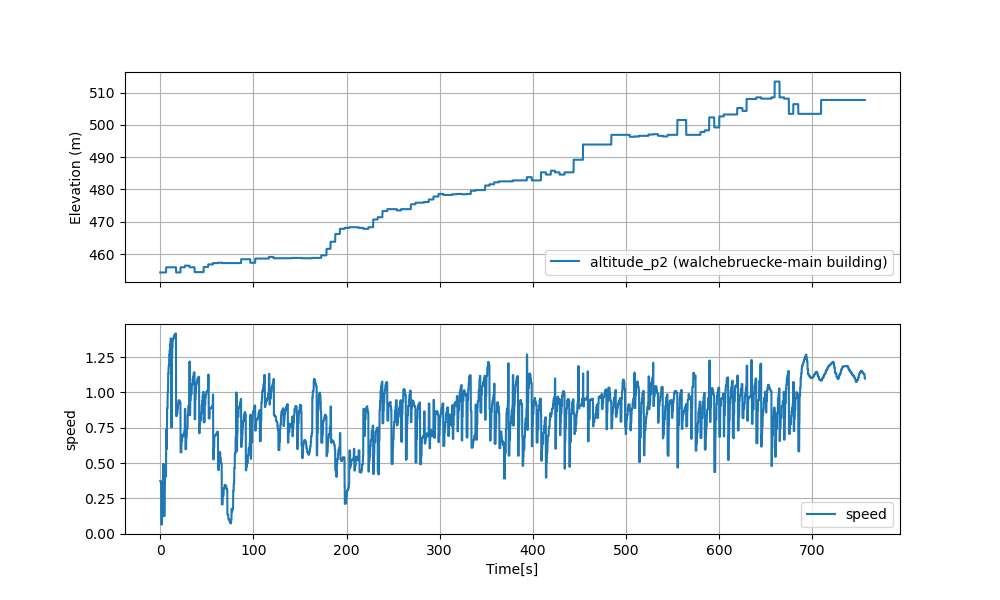

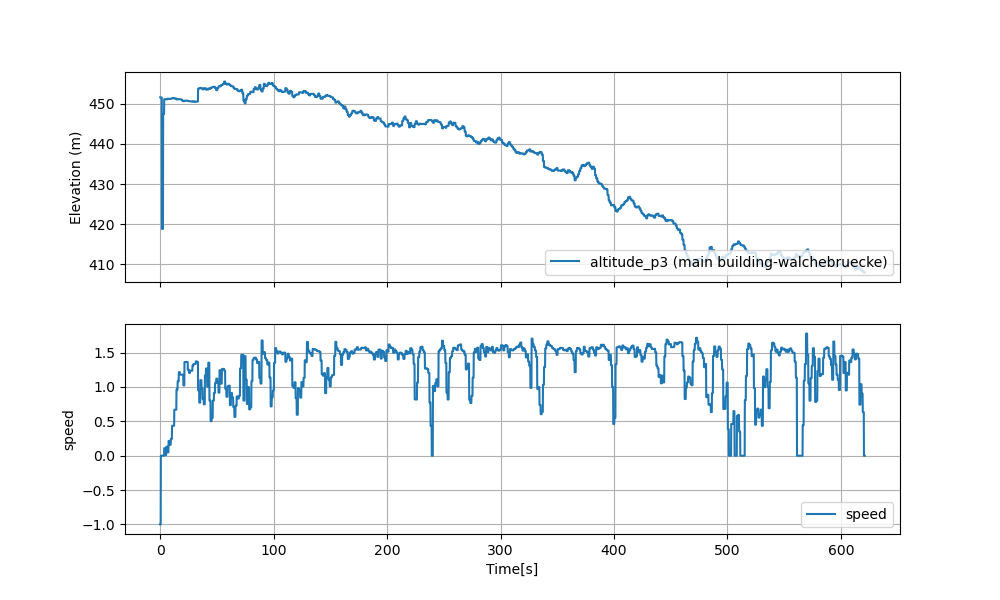

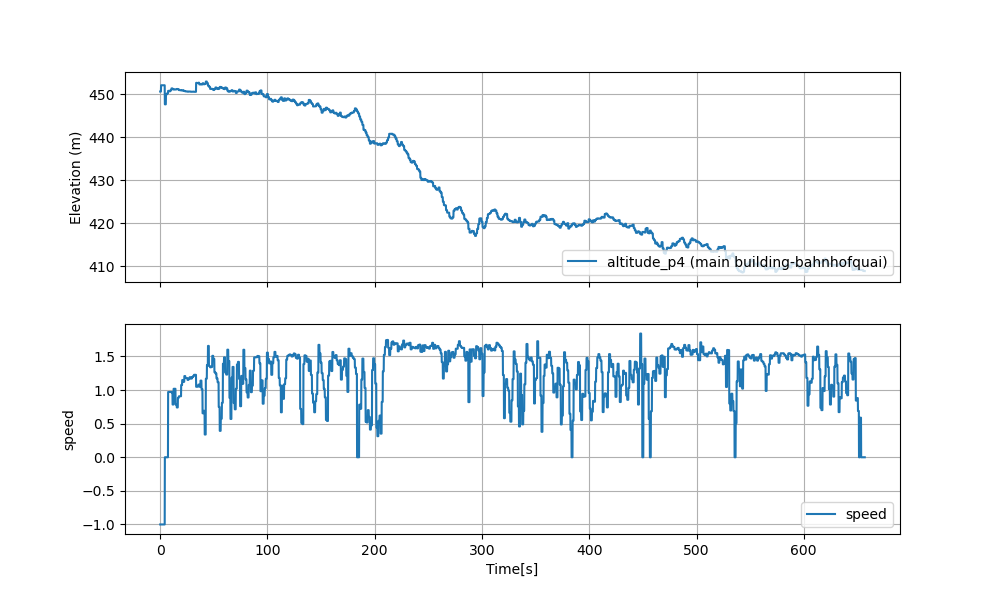

In [77]:
# Visualize the path of the trace
trace_p0 = Recording('./data/recorded/group00_trace01.json', no_labels=False, mute=True)  # Second example file: data/example/short_walk.json
trace_p0.plot([['altitude'], ['speed']], 
             ylabels=[ 'Elevation (m)', 'speed'],
             labels=[['altitude_p0 (central-main building)'], ['speed']])

trace_p1 = Recording('./data/recorded/group00_trace02.json', no_labels=False, mute=True) 
trace_p1.plot([['altitude'], ['speed']], 
             ylabels=[ 'Elevation (m)', 'speed'],
             labels=[['altitude_p1 (central-clausius-main building)'], ['speed']])

trace_p2 = Recording('./data/recorded/group00_trace03.json', no_labels=False, mute=True)  
trace_p2.plot([['altitude'], ['speed']], 
             ylabels=[ 'Elevation (m)', 'speed'],
             labels=[['altitude_p2 (walchebruecke-main building)'], ['speed']])
            
trace_p3 = Recording('./data/recorded/group00_trace04.json', no_labels=False, mute=True)  
trace_p3.plot([['altitude'], ['speed']], 
             ylabels=[ 'Elevation (m)', 'speed'],
             labels=[['altitude_p3 (main building-walchebruecke)'], ['speed']])

trace_p4 = Recording('./data/recorded/group00_trace05.json', no_labels=False, mute=True)  
trace_p4.plot([['altitude'], ['speed']], 
             ylabels=[ 'Elevation (m)', 'speed'],
             labels=[['altitude_p4 (main building-bahnhofquai)'], ['speed']])

# notice: plots of trace 10 and 14 look weird, so many stairs. recorded by scz

# Generate computed traces

Small example that adds an accelerometer magnitude trace

<code>Dataset.fromLists(name, values, timestamps)</code> can be used to save a new or modified sensor into the Recording object.

<code>name</code>: used for plotting  
<code>values</code>: modified values  
<code>timestamps</code>: list of timestamps, one timestamp per value, usually directly taken from the original data

Note: This change is only executed locally and not saved to the json file. Everytime you reload your dataset, you have to re-execute this calculation


In [ ]:
from math import sqrt

# Trace must contain lilygo accelerometer data
assert('ax' in trace.data and 'ay' in trace.data and 'az' in trace.data)
# And those traces must be of the same length
assert(len(trace.data['ax'].values) == len(trace.data['ay'].values)  and len(trace.data['ax'].values) == len(trace.data['az'].values) )

magn = [sqrt(a**2+trace.data['ay'].values[i]**2+trace.data['az'].values[i]**2)for i, a in enumerate(trace.data['ax'].values)]

trace.data['amagn'] = Dataset.fromLists('Accelerometer magnitude', magn, trace.data['ax'].timestamps)

trace.plot([['ax', 'ay', 'az'], ['amagn']])

# FYI: How timestamps are handeled (you probably don't need this)

Every time the app receives a bluetooth package, up to 16 sensor values are stored at once together with the current timestamp. So not every sensor reading has a 100% perfectly defined timestamp.

Every <code>Dataset</code> has a list of <code>raw_timestamps</code> which are tuples of type <code>(packet number, timestamp)</code>

The timestamps are standard unix timestamps in milliseconds

For example the first two entries say "The 0th value came in at 1641564932653, the 16th value at 1641564932694"

In [65]:
t = trace.data['ax'].raw_timestamps[-1][1]-trace.data['ax'].raw_timestamps[0][1]




The LILYGO uses a FIFO with a constant sample rate, so it should be a fair assumption, that the delay between two consecutive reaings always is the same.

By default the <code>Dataset.timestamps</code> list is linearly interpolated between the first and the last timestamps (<code>linspace(0, last_timestamp, num=len(values))</code>)

In [ ]:
# Compare "ideal" interpolated timestamps against actual received timestamps
trace.data['ideal_ts'] = Dataset('ideal_ts', 
                                   [trace.data['timestamp'].values[0],trace.data['timestamp'].values[-1]], 
                                   [(0,trace.data['timestamp'].values[0]), 
                                    (len(trace.data['timestamp'].values), trace.data['timestamp'].values[-1])])
trace.plot(['timestamp', 'ideal_ts'], labels=['Received timestamps', 'Calculated Timestamps'], ylabels=['ms'])